# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## 1.0 Business Understanding

### 1.1 Company Vision & High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies, such as Apple and Amazon, have succesfully transitioned into the entertainment industry. By leveraging its extensive technological expertise, vast resources, and global reach, Microsoft can produce high-quality movies that will enhance its brand image and increase its cultural influence.

This research seeks to use the available data to gain valuable insights into trends and consumption patterns, enabling the company to create tailored content that resonates with viewers and maximizes box office success. Within this notebook, I will explore what types of films Microsoft should make to maximize profitability and create positive brand exposure by producing critically acclaimed films. 

### 1.2 Film Industry Background

The period that this analysis will focus on starts from the New Hollywood Era. The New Hollywood era, spanning the late 1960s to the 1970s, was marked by auteur-driven filmmaking. High recognizable directors like Francis Ford Coppola, Martin Scorsese, and Steven Spielberg emerged during this time period and are still relevant today. The era produced groundbreaking films like "The Godfather," "Taxi Driver," and "Jaws," which not only achieved critical acclaim but also achieved significant commercial success.

In the 1980s and 1990s, the blockbuster era took hold, with studios increasingly focusing on  films designed to attract large audiences and generate substantial profits. Directors like James Cameron and Steven Spielberg emerged and became synonymous with blockbuster filmmaking. "Titanic", which was directed by James Cameron, became the first billion dollar movie. It also won multiple awards, including an Oscar for Best Picture. 

In the 21st century, franchises, established intellectial properties (IPs), and cinematic universes are prevalent. Recognizable IPs such as Marvel and Star Wars series domanite the box office, attracting massive audiences and generating billions of dollars in revenue. Other IPs, such as Lego, Barbie, and Nintendo, have also plunged into filmmaking and have seen great success. These blockbusters often combine action, visual effects, and interconnected storytelling to create immersive cinematic experiences. However, strong independent voices in non-franchise cinema exist, with the likes of filmmakers like Quentin Tarantino and Wes Anderson. Prestige film awards, such as the Academy Awards, the Golden Globes, and the Cannes Film Festival, are also highly regarded in the industry and in popular culture.  


### 1.3 Research Goals

Given the above goals and industry background, this analysis will focus on the following topics:
- Limit analysis to films released between 1969 and 2019.
- Investigate the types of films that produce high ROIs. 
- Find directors with experience creating either high ROI, high prestige films, or both. 

Let's dive in!

## 2.0 Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime

%matplotlib inline

### 2.1 IMDB

Let's examine IMDB's database first, which is the most extensive of the three. I will need information on movies titles, their genres, and the directors per film. 

In [2]:
#Connect to database

conn = sqlite3.connect("Data/im.db")

#Review tables
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Query tables 
movie_basics = pd.read_sql("""SELECT * FROM movie_basics LIMIT 10;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
movie_akas = pd.read_sql("""
SELECT movie_id
FROM movie_akas
WHERE language = 'en'
;""", conn)
movie_akas.head()

,movie_id
0,tt10027708
1,tt10027708
2,tt1014759
3,tt1014759
4,tt10225354


Based on these initial queries, I will need to connect the additional tables to add the directors per film.

### 2.2 The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Additionally, films will be categorized by budget so that the budget can be discribed as low, mid, or high. Eventually, I can tie this information to the IMDB table and identify which films and directors have produced high ROIs. 

In [5]:
#Import data
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#Preview table
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#Review data structure
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The initial assessment is that this data will need to be converted in the following ways:

- The budget and gross data columns need to be converted to integers. 
- The release_date column needs to be coverted to datetime object.
- There are no null values, but I will need to further examine to make sure that the values are valid .

### 2.3 The Academy Awards

This dataset will be critical in providing information on which films and directors have been critically accalimed. 

In [7]:
#Import Data
oscars_df = pd.read_csv('Data/the_oscar_award.csv')

#Preview Data
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [8]:
#Review data structure 

oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


Based on this preliminary review, I will need to do the following:
- Make sure that the name column belongs to only people.
- Find out the missing data from films
- Filter by relevant categories - in this analysis, we will only look at films that won were either nominated or won  in recognizable categories like Best Picture, etc. 

## 3.0 Data Preparation

Now that we have a good understanding of our data, the next step is to clean the datasets and engineer some features.

### 3.1 IMDB

#### 3.1.1 Movie Genres

For the IMDB dataset, I will need the film name, release year, director, and genre. I will also filter films made prior to 1969 and any foreign films. 

In [82]:
#Query relevant tables and preview data

movies_data = pd.read_sql(
"""
SELECT primary_title AS movie, 
       start_year, 
       genres,
       primary_name AS director,
       death_year
  FROM movie_basics
      JOIN directors 
           USING(movie_id)
      JOIN persons
           USING(person_id)
  WHERE start_year BETWEEN 1969 AND 2019
    AND movie_id IN (SELECT movie_id
                     FROM movie_akas
                     WHERE language = 'en')
;""", conn)

#Preview results
movies_data.head()

,movie,start_year,genres,director,death_year
0,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul,2011.0
1,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee,2006.0
2,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.0
3,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz,2011.0
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento,NaN


In [44]:
#Review DataFrame structure
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43337 entries, 0 to 43336
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie       43337 non-null  object
 1   start_year  43337 non-null  int64 
 2   genres      42802 non-null  object
 3   director    43337 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [45]:
#Check for duplicates
duplicates = movies_data[movies_data.duplicated()]
print(len(duplicates))
duplicates.head()

22016


,movie,start_year,genres,director
3,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz
5,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento
8,Children of the Green Dragon,2010,Drama,Bence Miklauzic
9,Children of the Green Dragon,2010,Drama,Bence Miklauzic
11,The Tragedy of Man,2011,"Animation,Drama,History",Marcell Jankovics


In [46]:
# Remove Duplicates
movies_data.drop_duplicates(inplace=True)

#Check number of records
print(len(movies_data))

#Review results
movies_data.head()

21321


,movie,start_year,genres,director
0,One Day Before the Rainy Season,2019,"Biography,Drama",Mani Kaul
1,Sabse Bada Sukh,2018,"Comedy,Drama",Hrishikesh Mukherjee
2,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Raoul Ruiz
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",Valeria Sarmiento
6,So Much for Justice!,2010,History,Miklós Jancsó


In [47]:
#Check for extraneous values
for col in movies_data.columns:
    print(col, '\n', movies_data[col].value_counts(normalize=True).head(), '\n')

movie 
 ABCs of Death 2                      0.001454
Hongmao and Lantu: Phoenix Rising    0.000750
Secrets of the North Sea             0.000610
Bridges of Sarajevo                  0.000610
Movie 43                             0.000610
Name: movie, dtype: float64 

start_year 
 2014    0.113222
2015    0.113175
2013    0.112284
2012    0.108531
2016    0.107312
Name: start_year, dtype: float64 

genres 
 Drama            0.218079
Documentary      0.140973
Comedy           0.061009
Comedy,Drama     0.039148
Drama,Romance    0.026242
Name: genres, dtype: float64 

director 
 Jing Wong          0.000844
Takashi Miike      0.000844
Koichi Sakamoto    0.000797
Poj Arnon          0.000797
Herman Yau         0.000797
Name: director, dtype: float64 



In [48]:
#Drop Null values
movies_data.dropna(inplace=True)

#Print results from data cleaning
print(f" This table has {len(movies_data)} entries. \
Each entry represents a film, its release date, genres, and director.")

 This table has 20997 entries. Each entry represents a film, its release date, genres, and director.


### 3.2 The Numbers

Next step is to clean and create features for the numbers dataset. From here, we want to find net profits and ROI. In addition to that, each film will be categorized by the size of their budget. 

In [49]:
#Check for duplicates
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


In [50]:
#Check for extraneous values
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 40    0.010797
79    0.010797
39    0.010797
80    0.010608
73    0.010608
Name: id, dtype: float64 


release_date 
 2015-12-31    0.001894
2002-10-11    0.001705
2000-12-22    0.001705
2014-10-10    0.001705
2008-10-24    0.001705
Name: release_date, dtype: float64 


movie 
 Halloween                      0.000568
The Texas Chainsaw Massacre    0.000379
The Last House on the Left     0.000379
Total Recall                   0.000379
The Square                     0.000379
Name: movie, dtype: float64 


production_budget 
 20000000    0.042811
10000000    0.038644
30000000    0.033340
25000000    0.031824
15000000    0.031824
Name: production_budget, dtype: float64 


domestic_gross 
 0           0.034097
7000000     0.000758
8000000     0.000758
2000000     0.000758
15000000    0.000568
Name: domestic_gross, dtype: float64 


worldwide_gross 
 7000000     0.000568
6000000     0.000568
15000000    0.000568
8000000     0.000568
2000000     0.000568
Name: worldwide_gross, dtype: fl

Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped, but first, I will convert the columns to their appropiate data type. 

In [51]:
#Converting release_date column to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])

#Filter results to movies released after 1969 - start of the New Hollywood Era 
numbers_df = numbers_df.loc[numbers_df['release_date'] >= '1969']

#Create release_year column with datatype integer

#Review results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,550.0,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,150.0,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-60.0,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,320.0,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,320.0,2017,high


In [52]:
#Convert 'production_budget', 'domestic_gross', 'worldwide_gross' to integers

#Remove extra symbols from strings
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

AttributeError: Can only use .str accessor with string values!

In [53]:
#Convert columns to integers
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)

#Review results
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5279 non-null   int64         
 1   release_date       5279 non-null   datetime64[ns]
 2   movie              5279 non-null   object        
 3   production_budget  5279 non-null   int64         
 4   domestic_gross     5279 non-null   int64         
 5   worldwide_gross    5279 non-null   int64         
 6   net_profit         5279 non-null   int64         
 7   ROI                5279 non-null   float64       
 8   release_year       5279 non-null   int64         
 9   budget_level       5279 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 453.7+ KB


In [54]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]

Now that the data is clean, we can create the 'ROI' (Return on Investment) column with the following formula:

$$
ROI = \frac{Net Gross}{Production Budget} * 100
$$

In [55]:
#Add Net Profit Column
numbers_df['net_profit'] = numbers_df['worldwide_gross'] - numbers_df['production_budget']

#Add ROI Column
numbers_df['ROI'] = (numbers_df['net_profit'] / numbers_df['production_budget'] * 100).round(-1)

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,550.0,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,150.0,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-60.0,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,320.0,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,320.0,2017,high


In [56]:
#Add new column "Year" as integer
numbers_df['release_year'] = pd.DatetimeIndex(numbers_df['release_date']).year

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,550.0,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,150.0,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-60.0,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,320.0,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,320.0,2017,high


In [57]:
#Budget ranking - first, define function

def budget_ranking(budget):
    if budget < 500000:
        return "low"
    elif budget > 50000000:
        return "high"
    else:
        return "mid"

In [58]:
#Create new column and apply function

numbers_df['budget_level'] = numbers_df['production_budget'].apply(budget_ranking)
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,550.0,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,150.0,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-60.0,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,320.0,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,320.0,2017,high


### 3.3 The Academy Awards

In [59]:
#Filtering for films made between 1969 and 2019

oscars_df = oscars_df.loc[(oscars_df['year_film'] >= 1969) & (oscars_df['year_film'] <= 2019)]
print("Min year: ", oscars_df['year_film'].min())
print("Max year: ", oscars_df['year_film'].max())


Min year:  1969
Max year:  2019


In [60]:
#Check for duplicates
duplicates = oscars_df[oscars_df.duplicated()]
print(len(duplicates))

0


In [61]:
#Review duplicates list
duplicates

,year_film,year_ceremony,ceremony,category,name,film,winner


In [62]:
#Check for extraneous values
for col in oscars_df.columns:
    print(col, '\n', oscars_df[col].value_counts(normalize=True).head(), '\n\n')

year_film 
 2010    0.022250
2009    0.022250
2013    0.021615
2011    0.021615
2012    0.021615
Name: year_film, dtype: float64 


year_ceremony 
 2011    0.022250
2010    0.022250
2014    0.021615
2012    0.021615
2013    0.021615
Name: year_ceremony, dtype: float64 


ceremony 
 83    0.022250
82    0.022250
86    0.021615
84    0.021615
85    0.021615
Name: ceremony, dtype: float64 


category 
 BEST PICTURE                    0.189447
ACTRESS IN A SUPPORTING ROLE    0.162111
ACTOR IN A SUPPORTING ROLE      0.162111
DIRECTING                       0.162111
ACTOR IN A LEADING ROLE         0.139860
Name: category, dtype: float64 


name 
 Meryl Streep         0.013350
Jack Nicholson       0.007629
Martin Scorsese      0.005722
Al Pacino            0.005722
Denzel Washington    0.005086
Name: name, dtype: float64 


film 
 Network                    0.004450
The Godfather Part II      0.004450
Silver Linings Playbook    0.003814
Kramer vs. Kramer          0.003814
Terms of Endearment 

Some winners seem to be countries. This is an issue of who wins the award. For this analysis, we will only be looking at best actress, best actor, best director, and best picture awards. 

In [63]:
#Filter by award data types
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'DIRECTING', 'BEST PICTURE',
       'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'],
      dtype=object)

In [64]:
#Remove non-relevent awards
oscars_df = oscars_df[(oscars_df['category'].str.contains('act|directing|picture', case=False)) & \
                      (~oscars_df['category'].str.contains('writing|music|short', case=False))]
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'DIRECTING', 'BEST PICTURE',
       'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'],
      dtype=object)

In [65]:
#Recheck table
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4668,1969,1970,42,ACTOR,Richard Burton,Anne of the Thousand Days,False
4669,1969,1970,42,ACTOR,Dustin Hoffman,Midnight Cowboy,False
4670,1969,1970,42,ACTOR,Peter O'Toole,"Goodbye, Mr. Chips",False
4671,1969,1970,42,ACTOR,Jon Voight,Midnight Cowboy,False
4672,1969,1970,42,ACTOR,John Wayne,True Grit,True


In [66]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 4668 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      1573 non-null   int64 
 1   year_ceremony  1573 non-null   int64 
 2   ceremony       1573 non-null   int64 
 3   category       1573 non-null   object
 4   name           1573 non-null   object
 5   film           1573 non-null   object
 6   winner         1573 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 87.6+ KB


In [67]:
#Separate best picture awards from film staff awards
picture_awards = oscars_df[(oscars_df['category'].str.contains('picture', case=False)) &
                           (~oscars_df['category'].str.contains('directing', case=False))]

picture_awards.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4743,1969,1970,42,BEST PICTURE,"Hal B. Wallis, Producer",Anne of the Thousand Days,False
4744,1969,1970,42,BEST PICTURE,"John Foreman, Producer",Butch Cassidy and the Sundance Kid,False
4745,1969,1970,42,BEST PICTURE,"Ernest Lehman, Producer","Hello, Dolly!",False
4746,1969,1970,42,BEST PICTURE,"Jerome Hellman, Producer",Midnight Cowboy,True
4747,1969,1970,42,BEST PICTURE,"Jacques Perrin and Hamed Rachedi, Producers",Z,False


In [68]:
picture_awards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 4743 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      298 non-null    int64 
 1   year_ceremony  298 non-null    int64 
 2   ceremony       298 non-null    int64 
 3   category       298 non-null    object
 4   name           298 non-null    object
 5   film           298 non-null    object
 6   winner         298 non-null    bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 16.6+ KB


In [69]:
cols = ['category', 'name']
for col in cols:
    print(col, '\n', picture_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 BEST PICTURE    1.0
Name: category, dtype: float64 


name 
 Steven Spielberg and Kathleen Kennedy, Producers    0.010067
Lawrence Bender, Producer                           0.010067
Irwin Winkler and Robert Chartoff, Producers        0.010067
Ismail Merchant, Producer                           0.006711
Saul Zaentz, Producer                               0.006711
Warren Beatty, Producer                             0.006711
Peter Yates, Producer                               0.006711
David Puttnam, Producer                             0.006711
Emma Thomas and Christopher Nolan, Producers        0.006711
James Cameron and Jon Landau, Producers             0.006711
Name: name, dtype: float64 




In [70]:
#Isolate directors
director_awards = oscars_df[(~oscars_df['category'].str.contains('picture', case=False)) &
                           (oscars_df['category'].str.contains('directing', case=False))]
cols = ['category', 'name']
for col in cols:
    print(col, '\n', director_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 DIRECTING    1.0
Name: category, dtype: float64 


name 
 Martin Scorsese      0.035294
Woody Allen          0.027451
Steven Spielberg     0.027451
Robert Altman        0.019608
Clint Eastwood       0.015686
Peter Weir           0.015686
Ang Lee              0.011765
Quentin Tarantino    0.011765
Alexander Payne      0.011765
Roman Polanski       0.011765
Name: name, dtype: float64 




## 4.0 Exploratory Data Analysis

### 4.1 Does budget correlate to profits?

First, lets examine what correlation between ROI and worldwide gross profit.

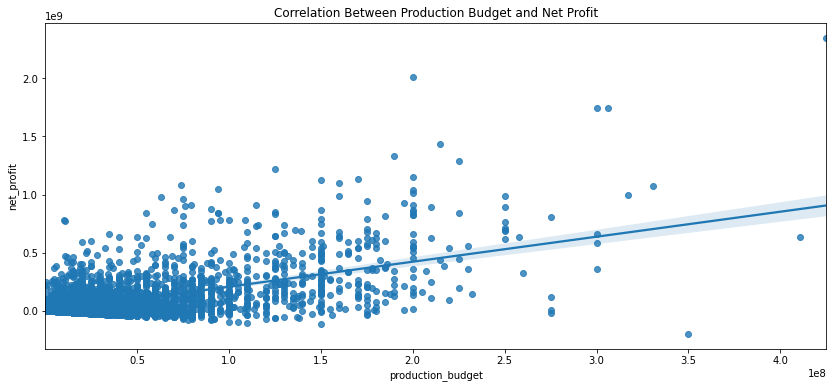

In [71]:
# Set the width and height
plt.figure(figsize=(14,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit')

#Create plot
sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit']);

From the graph above, we can observe a modest positive correlation betweem budget and net profit. 

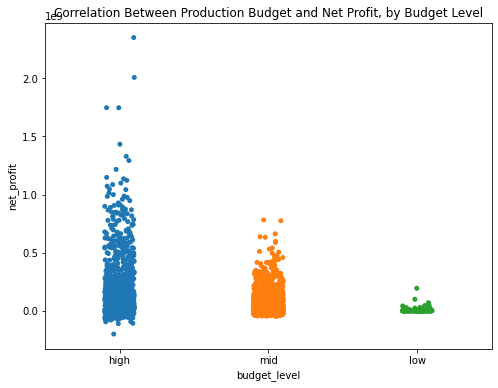

In [72]:
# Set the width and height
plt.figure(figsize=(8,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level')

#Create plot
sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit']);

While low budget movies can certainly be profitable, mid and high budgets have a better chance of earning much higher profits. 

## 4.2 Pick directors for every budget

In [74]:
test = numbers_df.merge(movies_data, on='movie')
test.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level,start_year,genres,director
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,550.0,2009,high,2011,Horror,Atsushi Wada
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,150.0,2011,high,2011,"Action,Adventure,Fantasy",Rob Marshall
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-60.0,2019,high,2019,"Action,Adventure,Sci-Fi",Simon Kinberg
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,320.0,2015,high,2015,"Action,Adventure,Sci-Fi",Joss Whedon
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,580.0,2018,high,2018,"Action,Adventure,Sci-Fi",Anthony Russo


In [80]:
directors_roi = test.groupby('director')['ROI'].mean()
directors_roi

director
Abdolreza Kahani      -100.0
Abeer Zeibak Haddad    -90.0
Adam Green             750.0
Adam Shankman          250.0
Adam Weingrod            5.0
                       ...  
Zhigang Yang            40.0
Zhijian Tong           290.0
Zsófia Szilágyi        290.0
Éric Toledano         -100.0
Ömür Atay               55.0
Name: ROI, Length: 769, dtype: float64

## 4.3 Oscar nominated directors for prestige filmaking

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:



However, much research is still to be done. The biggest recommendation is to continue this research and explore the following: 